# Data Retrival

The data retrival part of this project has been done in a different repository which you can find [here](https://github.com/prp-e/digistyle_data_retrive) and it works on a fashion retail store in Iran. You can change it accordingly, but here we just use it for educational purposes only.

## Processing the retrived data

In this part, we're just processing the data in a format that we understand better. Because we're going to perform match-finding and then a search on them. Basically, we need to:

* Download Images
* Store images in a reliable place
* Collect addresses and images in a CSV file (or a database)

The whole procedure is like that, and there's no music theory or rocket science involved.

In [2]:
import json

raw_file = open('products.json')

json_file = json.loads(raw_file.read())

In [2]:
import os
import wget
import pandas as pd

product_csv = []
out_dir = 'data/images/'

In [11]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## Making the dataset

In [15]:
import time

for product in json_file:
    product_info = []
    file = wget.download(product['picture'], out=out_dir)
    product_info.append(file)
    product_info.append(product['url'])
    
    product_csv.append(product_info)
    time.sleep(1)

In [17]:
len(product_csv)

360

## Creating the CSV file

In [18]:
df = pd.DataFrame(product_csv)

In [19]:
df.head()

,0,1
0,data/images//23f988c31a34fa02610b3ee5554bb1b4c...,https://www.digistyle.com/product/7051816-بلوز...
1,data/images//ac569b3b0368b95d1677e7aaf15bd0628...,https://www.digistyle.com/product/7050133-بلوز...
2,data/images//7f9b29bc94dee0a0092c7f79eadbd876f...,https://www.digistyle.com/product/5134826-پولو...
3,data/images//b491886f4c39e271fb1762c253ddcc165...,https://www.digistyle.com/product/8641527-شلوا...
4,data/images//b5fcc805c22e024f10e292bf2984a435e...,https://www.digistyle.com/product/7050136-بلوز...


In [20]:
df.to_csv('data/products.csv', index=False, header=False)

# Visual Search Initiation

## Reading data from CSV

In [3]:
df = pd.read_csv('data/products.csv')

In [4]:
from DeepImageSearch import Index,LoadData,SearchImage

In [5]:
image_list = LoadData().from_folder(['data/images'])

## Indexing images

In [6]:
Index(image_list).Start()

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
yes


100%|██████████| 360/360 [00:51<00:00,  7.05it/s]
360it [00:00, 2532.93it/s]

Image Meta Information Saved: [meta-data-files/image_data_features.pkl]
Saved the Indexed File:[meta-data-files/image_features_vectors.ann]


## Performing basic search

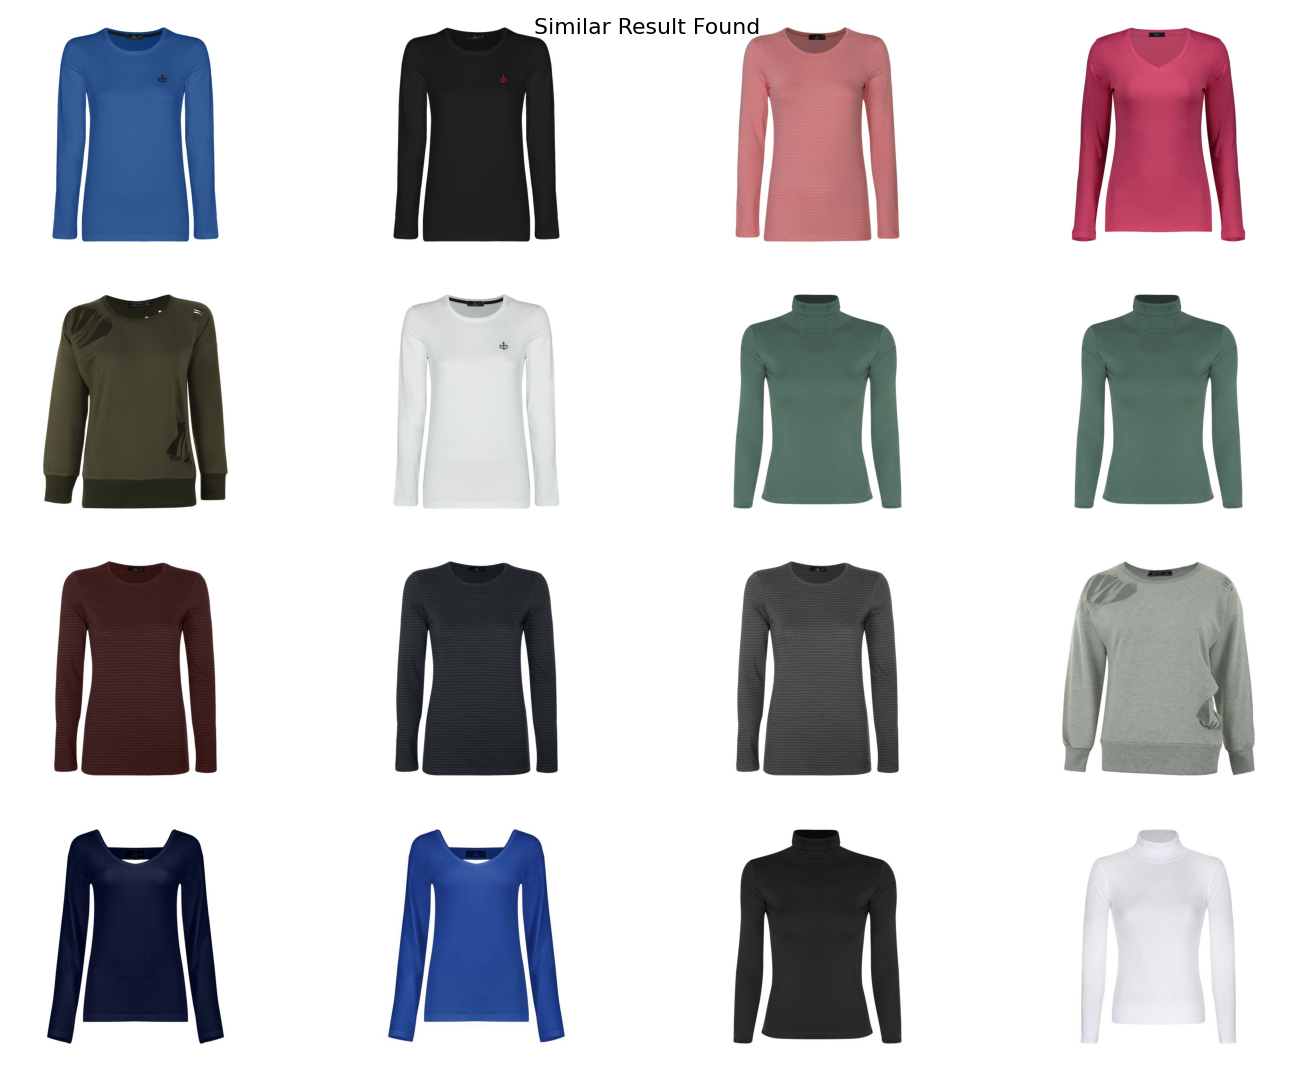

In [30]:
SearchImage().plot_similar_images(image_path='data/images/1b4dbc958dd25cbeed2c449d421009346fd96772_1615297647.jpg')

## Searching on a different image (from a different source)

In [7]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('test_data/skirt-2.jpg')

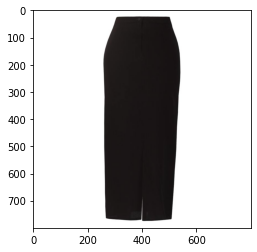

In [8]:
%matplotlib inline

plt.imshow(image)

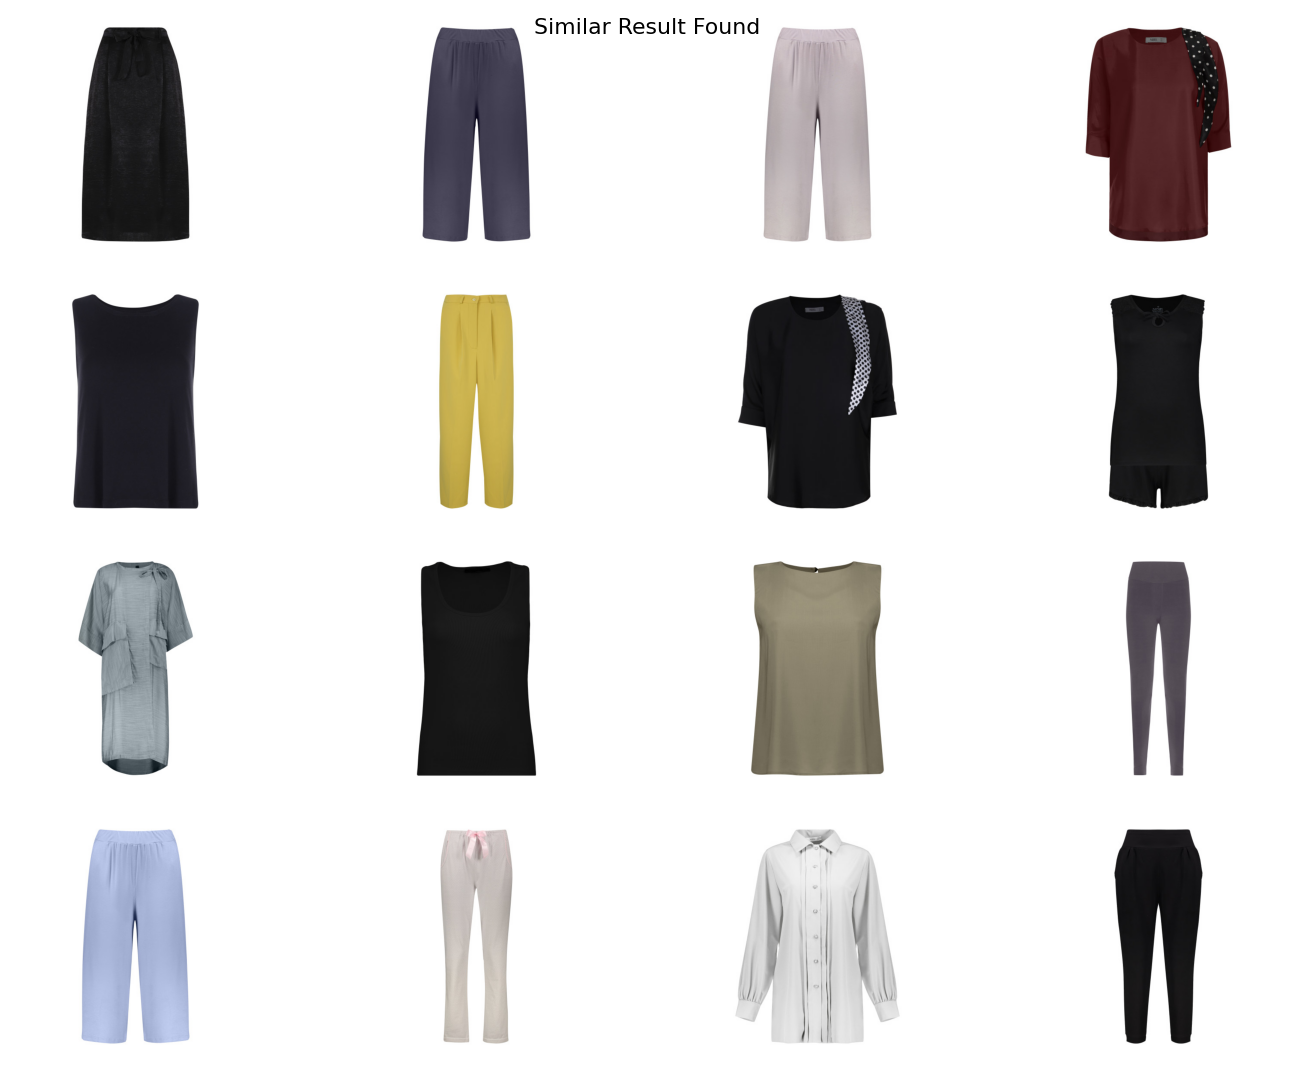

In [9]:
SearchImage().plot_similar_images(image_path='test_data/skirt-2.jpg')

# Performing search on a CSV file

For this part, what we need is basically a way to perform search on a CSV file (which can be done on a small scale and for the proof-of-concept phase. For later use, we may need _Meili Search_ or _Elastic_. 

In [13]:
df.columns = ['image', 'url']

In [14]:
df.head()

,image,url
0,data/images//ac569b3b0368b95d1677e7aaf15bd0628...,https://www.digistyle.com/product/7050133-بلوز...
1,data/images//7f9b29bc94dee0a0092c7f79eadbd876f...,https://www.digistyle.com/product/5134826-پولو...
2,data/images//b491886f4c39e271fb1762c253ddcc165...,https://www.digistyle.com/product/8641527-شلوا...
3,data/images//b5fcc805c22e024f10e292bf2984a435e...,https://www.digistyle.com/product/7050136-بلوز...
4,data/images//bc0adc95caecf9df1b894cb4e585bbab0...,https://www.digistyle.com/product/8191314-تونی...


In [31]:
df.loc[df['image'] == 'data/images//0e1aff34c00a60d1e129c84060401d36b8d88fab_1645878892.jpg']

,image,url
32,data/images//0e1aff34c00a60d1e129c84060401d36b...,https://www.digistyle.com/product/5730841-شلوا...


## Working on a function to perform the search (_PoC_)